In [9]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests

from operator import itemgetter
from pandas.io.json import json_normalize
from scipy import special, optimize

In [10]:
openFDA_API_key = 'TTwz56GNTpZnsL4il0pLIwz7F43QObZOQEssWlSU'
openFDA_URL = 'https://api.fda.gov/drug/event.json?api_key=%s'%(openFDA_API_key)

In [11]:
# Handy functions

# returns adverse events given drug name
def get_drug_adverse_event_data(drugname):
    try:
        request_str = openFDA_URL + '&search=patient.drug.medicinalproduct:'\
        +drugname+'&count=patient.reaction.reactionmeddrapt.exact'
        json_df = requests.get(request_str).json()
        return json_df['results']
    except ValueError:
        return -1

# returns adverse event count given adverse event name
def get_event_count(adverse_event_list, adverse_event):
    try:
        index=map(itemgetter('term'), adverse_event_list).index(adverse_event)
        return adverse_event_list[index].get('count')
    except ValueError:
        return 0
    

In [12]:
drugname1 = 'tylenol'
drugname2 = 'ibuprofen'
d1_list = get_drug_adverse_event_data(drugname1) # list comes back sorted by event count
d2_list = get_drug_adverse_event_data(drugname2) # list comes back sorted by event count
d1_top = d1_list[:2] # top five adverse events
d2_top = d2_list[:2] # top five adverse events
'''
print drugname1
for x in range(0, min(5, len(d1_list))):
    entry = d1_list[x]
    print 'term: ' + str(entry['term']) + " count " + str(entry['count'])
print drugname2
for x in range(0, min(5, len(d2_list))):
    entry = d2_list[x]
    print 'term: ' + str(entry['term']) + " count " + str(entry['count'])
'''

'\nprint drugname1\nfor x in range(0, min(5, len(d1_list))):\n    entry = d1_list[x]\n    print \'term: \' + str(entry[\'term\']) + " count " + str(entry[\'count\'])\nprint drugname2\nfor x in range(0, min(5, len(d2_list))):\n    entry = d2_list[x]\n    print \'term: \' + str(entry[\'term\']) + " count " + str(entry[\'count\'])\n'

In [13]:
event1='NAUSEA'
event2='ANXIETY'

tylenol_list=[get_event_count(d1_list, event1), get_event_count(d1_list, event2)]
ibuprofen_list=[get_event_count(d2_list, event1), get_event_count(d2_list, event2)]

In [6]:
tylenol_list

[5227, 2054]

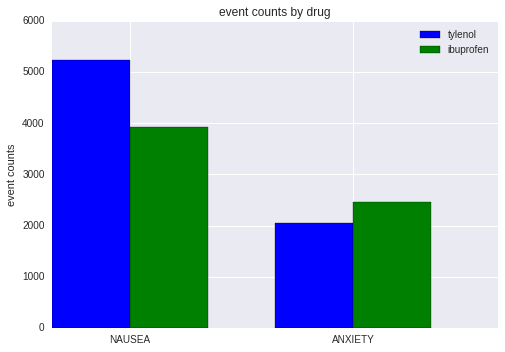

In [7]:
color1='blue'
color2='green'

ind=np.asarray([1,2])
width = 0.35 
fig, ax = plt.subplots()

rects1 = plt.bar(ind, tylenol_list, width, color=color1)
rects2 = plt.bar(ind+width, ibuprofen_list, width, color=color2)

ax.set_ylabel('event counts')
ax.set_title('event counts by drug')

ax.set_xticks(ind+width)
ax.set_xticklabels( (event1, event2) )

ax.legend( (rects1[0], rects2[0]), (drugname1, drugname2) )

plt.show()

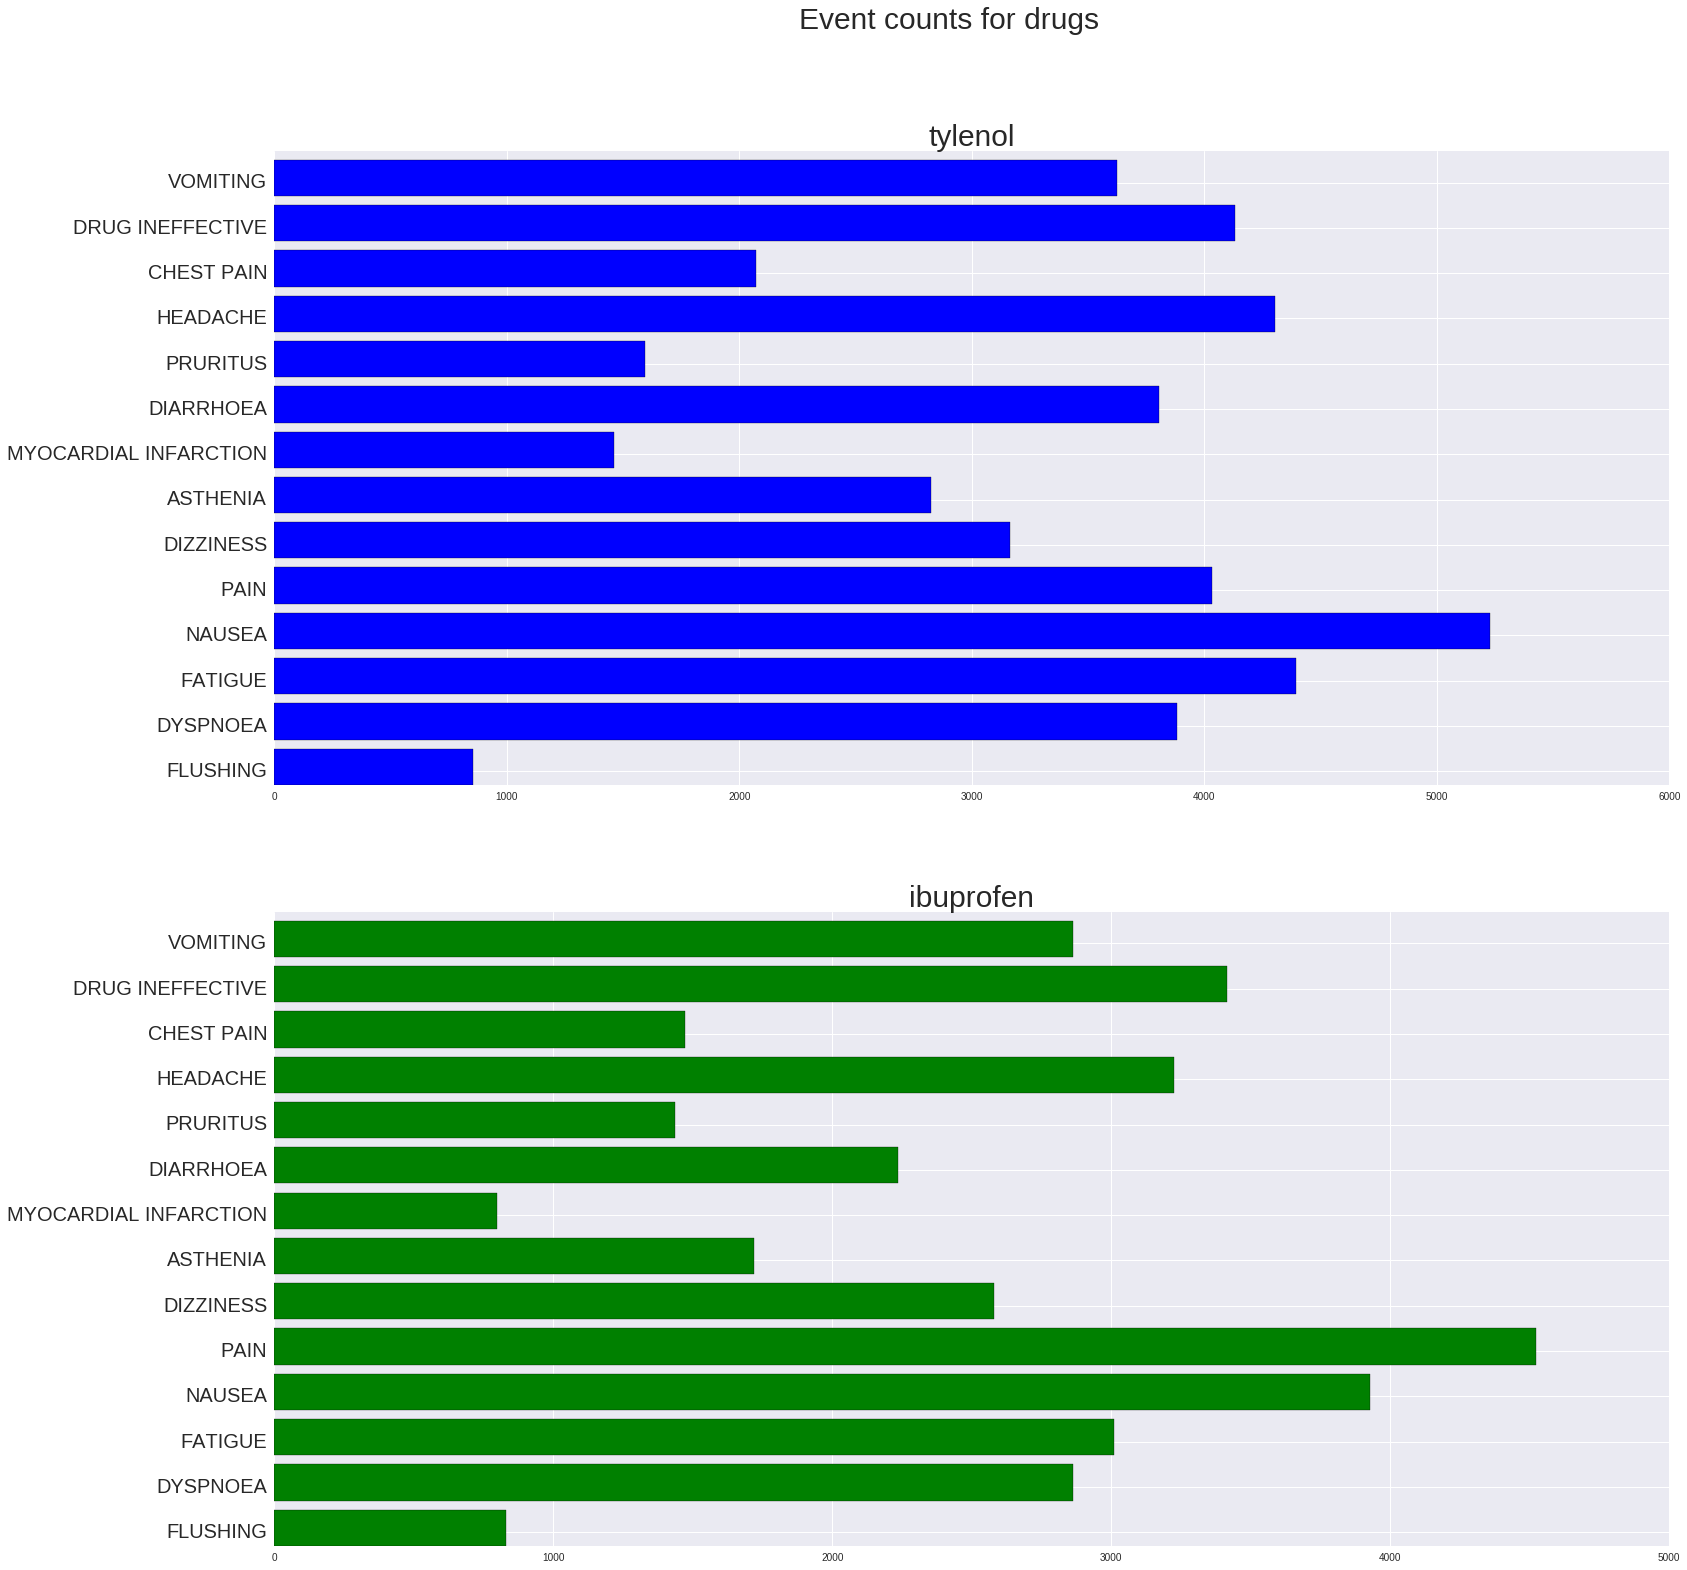

In [8]:
events=['FLUSHING', 'DYSPNOEA', 'FATIGUE', 'NAUSEA', 'PAIN', 'DIZZINESS', 'ASTHENIA', 'MYOCARDIAL INFARCTION', 'DIARRHOEA', 'PRURITUS', 'HEADACHE', 'CHEST PAIN', 'DRUG INEFFECTIVE', 'VOMITING']

count1=[]
count2=[]

for event in events:
    count1.append(get_event_count(d1_list, event))
    count2.append(get_event_count(d2_list, event))
    
ind=np.arange(len(count1))
                  
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25,25))

axes[0].barh(ind, count1, color=color1)
axes[0].set_yticks(ind+.3)
axes[0].set_yticklabels(events, fontsize=20)
axes[0].set_title(drugname1, fontsize=30)

axes[1].barh(ind, count2, color=color2)
axes[1].set_yticks(ind+.3)
axes[1].set_yticklabels(events, fontsize=20)
axes[1].set_title(drugname2, fontsize=30)

plt.suptitle('Event counts for drugs', fontsize=30)

plt.show()